C:\Users\rwilliams\PycharmProjects\evo-sim-cuda-python\visualization\creature_rendering.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  slope = (y1 - y0) / (x1 - x0)
C:\Users\rwilliams\PycharmProjects\evo-sim-cuda-python\visualization\creature_rendering.py:13: RuntimeWarning: invalid value encountered in double_scalars
  slope = (y1 - y0) / (x1 - x0)
C:\Users\rwilliams\PycharmProjects\evo-sim-cuda-python\visualization\creature_rendering.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  step_size = 1 / length_of_line


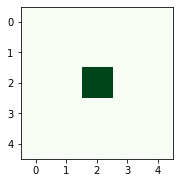

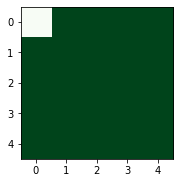

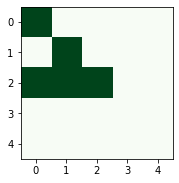

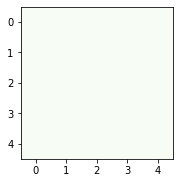

{'world_size': 5,
 'global_creature_id_counter': 2,
 'world_array': array([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 'carbon_dioxide_map': array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 'plants': [array([[ 1.,  2.,  2.,  0., 10.],
         [ 1.,  0.,  0.,  0., -1.],
         [ 0.,  0., -1.,  0., -1.],
         [ 0.,  0., -1., -1., -1.],
         [ 0.,  0., -1., -1., -1.],
         [ 0.,  0., -1.,  0., -1.],
         [ 0., -1., -1., -2., -2.],
         [ 0.,  0., -1.,  0., -2.],
         [ 0.,  0., -1., -1., -1.],
         [ 0.,  0., -2.,  0., -3.],
         [ 0.,  0., -1.,  0., -2.],
         [ 0.,  0., -1., -1., -1.]])]}

In [2]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar
import simulation.gas_drift as gd
import simulation.plant_simulation as ps

world_params = { 'world_size': 5,
                 'global_creature_id_counter': int(1) }

world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)

world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)
world_params['carbon_dioxide_map'][0][0] = 0

sc.spawn_new_plants(world_params=world_params,
                             num_plants=1)

creature_render.place_creatures(world_params)

ar.render_array(world_params['world_array'])
ar.render_array(world_params['carbon_dioxide_map'])

for i in range(500):
    ps.photosynthesize(world_params)
    gd.move_gases(world_params)
    ps.grow_plants(world_params)

creature_render.place_creatures(world_params)

ar.render_array(world_params['world_array'])
ar.render_array(world_params['carbon_dioxide_map'])

world_params